# CO2 emissions by a vehicles.

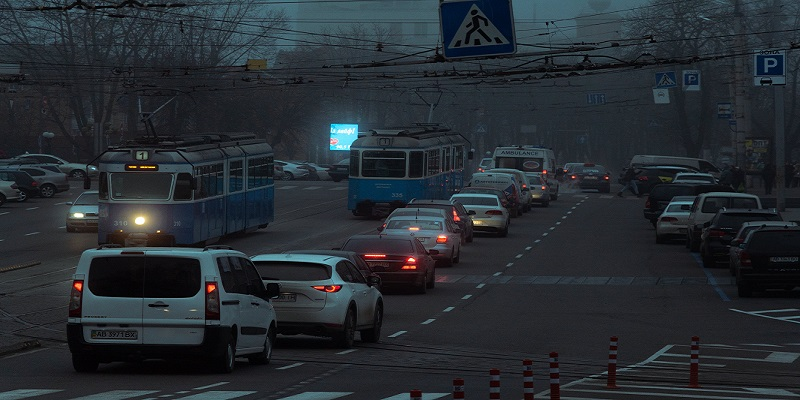

## Exploratory Data Analysis

This dataset contains amount of CO2 emissions by a vehicle depending on their various features.


**CONTENT**


This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

**Model**

- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

**Transmission**
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

**Fuel type**
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas

**Fuel Consumption**

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

**CO2 Emissions**

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df = pd.read_csv("CO2 Emissions_Canada.csv")

### First Look on Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
df.duplicated().sum()

1103

In [7]:
df.select_dtypes('object').columns

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

In [8]:
cat_v = list(df.select_dtypes('object').columns)
unique_type = [df[i].nunique() for i in cat_v]
unique_type

[42, 2053, 16, 27, 5]

In [9]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


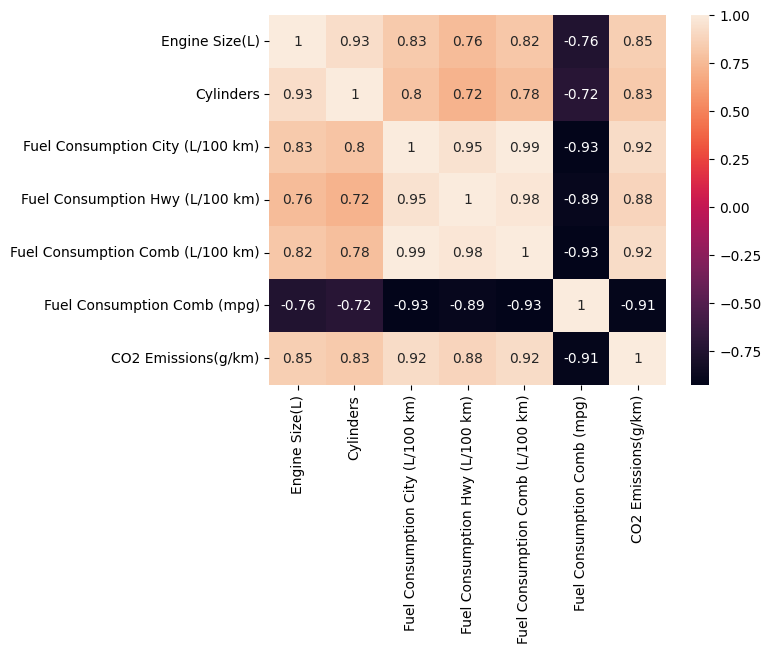

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

- There are no null values in the dataset
- there are duplicate values in the dataset
- there are 5 categorical variables.
- name of maker and model have very high cardinality
- almost all of the categorical variables are highly correlated with $ CO_2 $ emissions

### Univariate Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

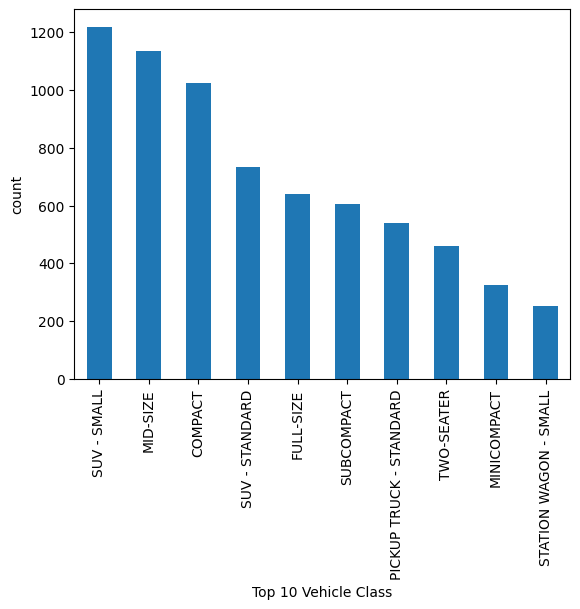

In [12]:
df ['Vehicle Class'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',xlabel='Top 10 Vehicle Class',ylabel='count');

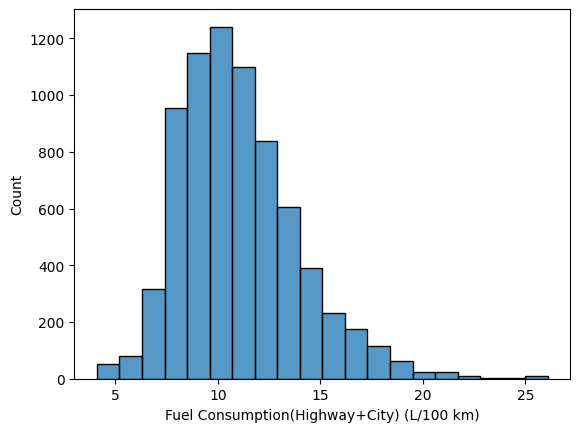

In [13]:
sns.histplot(data=df,x='Fuel Consumption Comb (L/100 km)',bins=20)
plt.xlabel('Fuel Consumption(Highway+City) (L/100 km)');

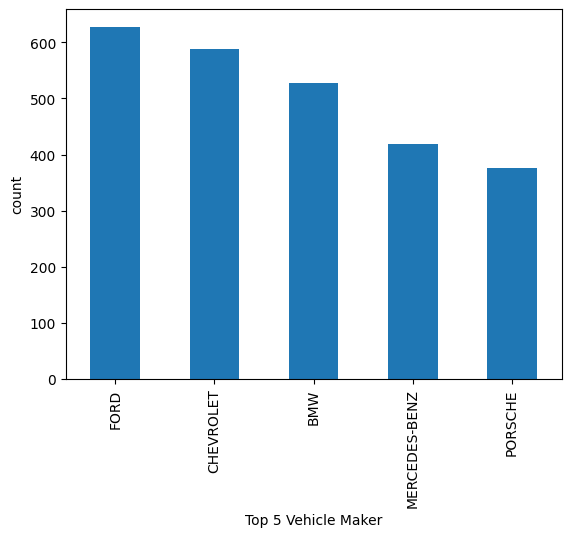

In [14]:
df ['Make'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',xlabel='Top 5 Vehicle Maker',ylabel='count');

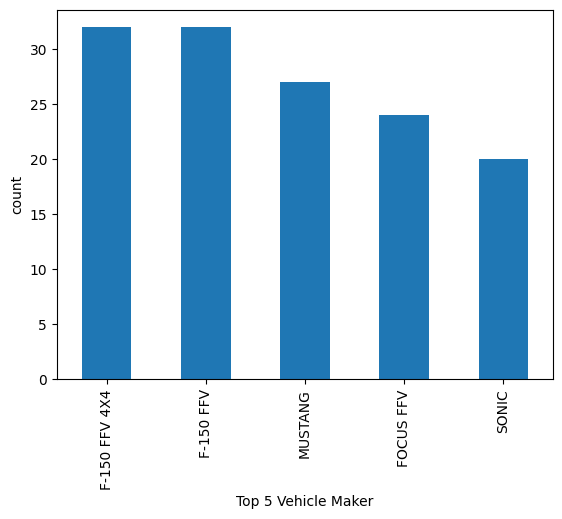

In [15]:
df ['Model'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',xlabel='Top 5 Vehicle Maker',ylabel='count');

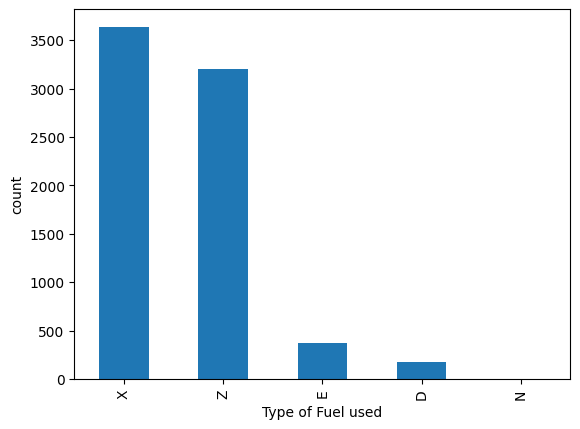

In [16]:
df ['Fuel Type'].value_counts().plot(kind='bar',xlabel='Type of Fuel used',ylabel='count');

### Bivariate Analysis

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [31]:
#important categorical variables
cat_var = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type','Engine Size(L)','Cylinders']
cat_var

['Make',
 'Vehicle Class',
 'Transmission',
 'Fuel Type',
 'Engine Size(L)',
 'Cylinders']

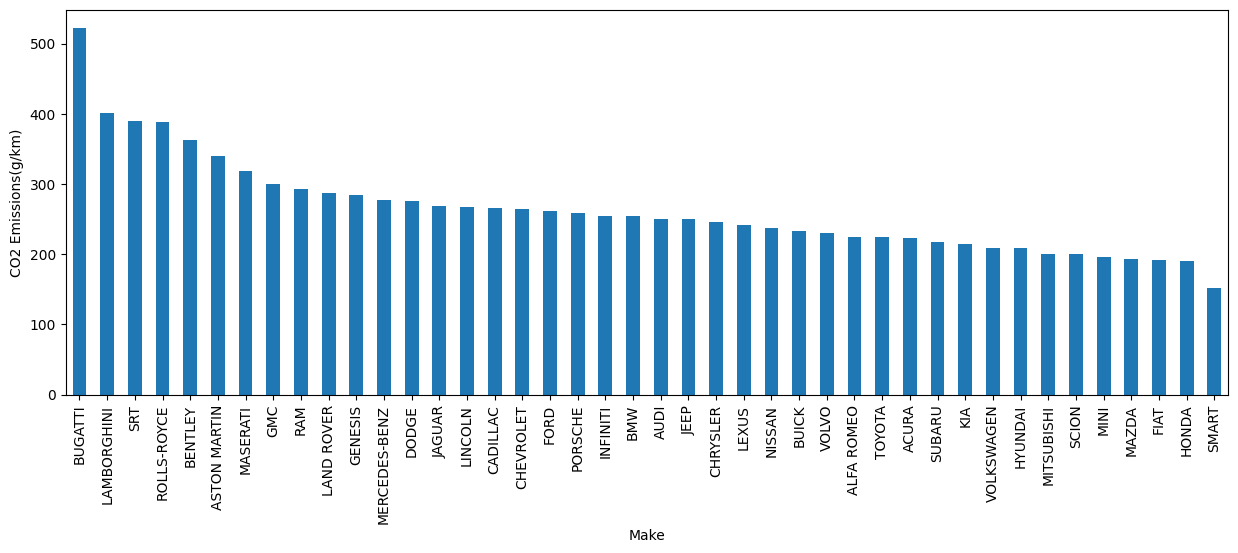

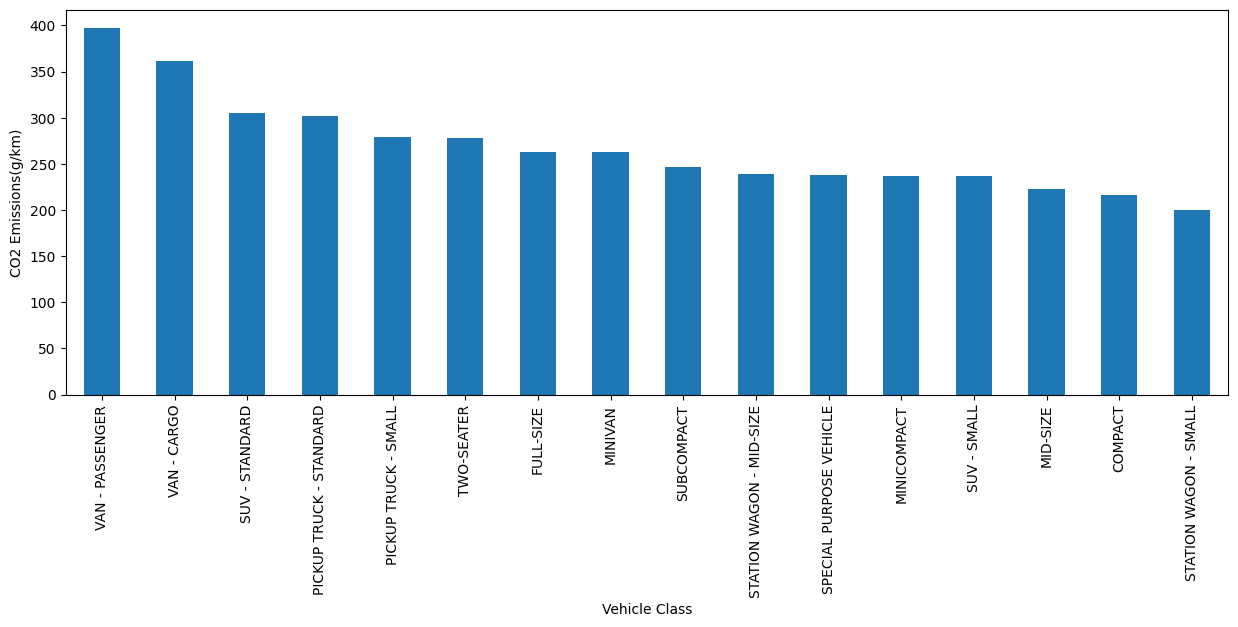

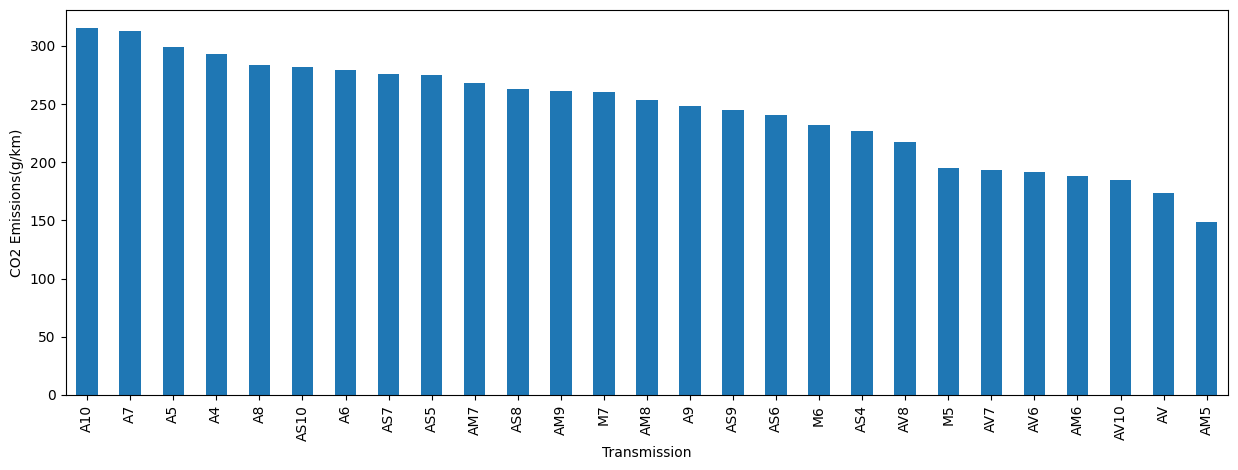

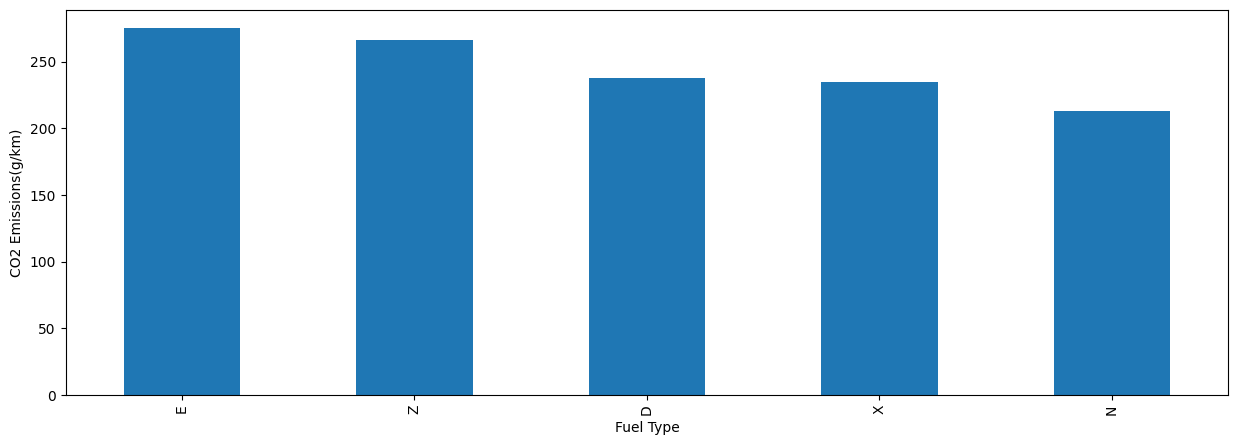

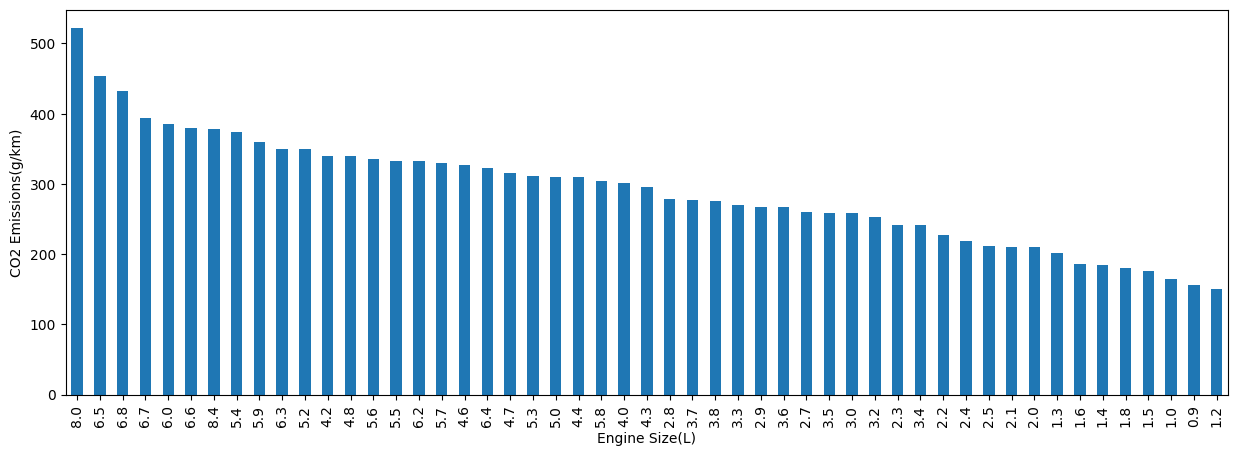

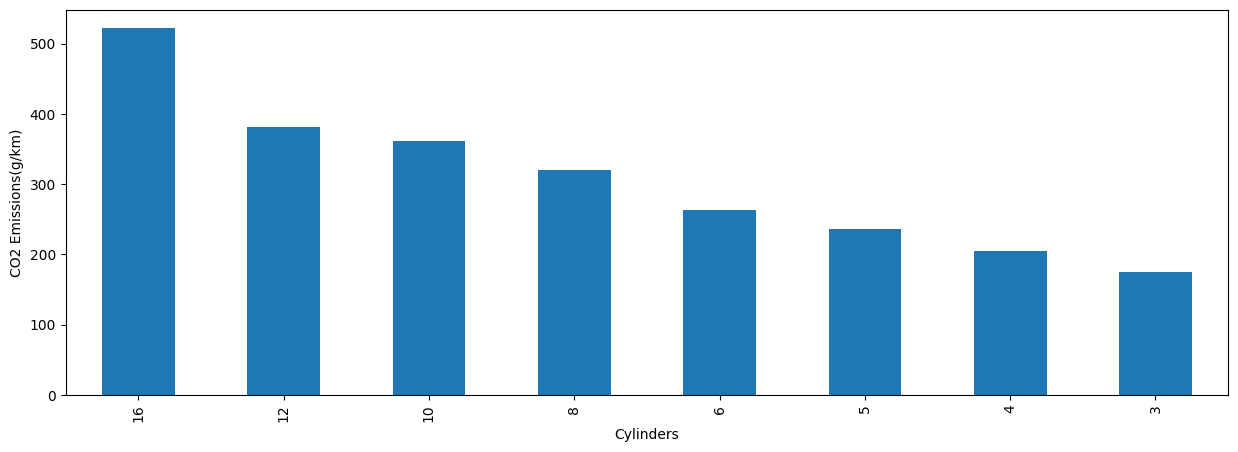

In [32]:
#barplot
for i in cat_var:
    group_mean = df['CO2 Emissions(g/km)'].groupby(df[i]).mean().sort_values(ascending=False)
    plt.figure(figsize=[15,5])
    group_mean.plot(kind='bar',fontsize=10,ylabel='CO2 Emissions(g/km)');
    

**Insights**
-  Bugati has highest $CO_2$ emission followed by Lamborghini
- Other than passanger and cargo Vehicles all other vehcile classes have almost same  $CO_2$ emission
- Fuel Type *E* have high  $CO_2$ emission
- With the increaseof engine size and number of cylinders  $CO_2$ emission also increases

In [35]:
#list of important numerical features
num_var =[
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 ]
num_var

['Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)']

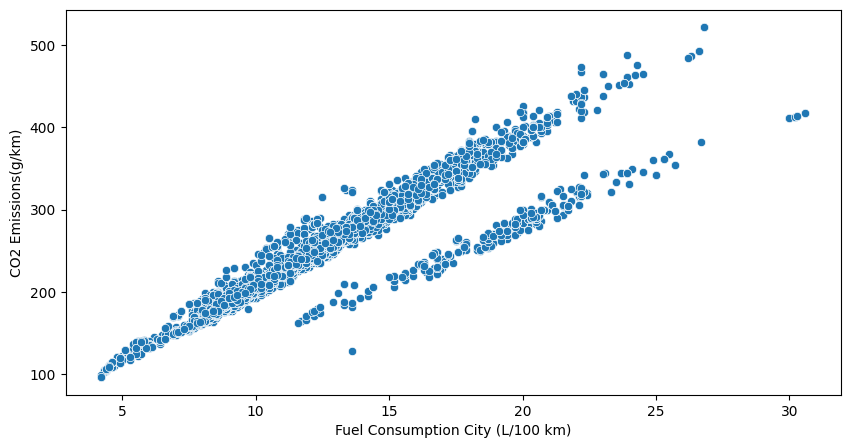

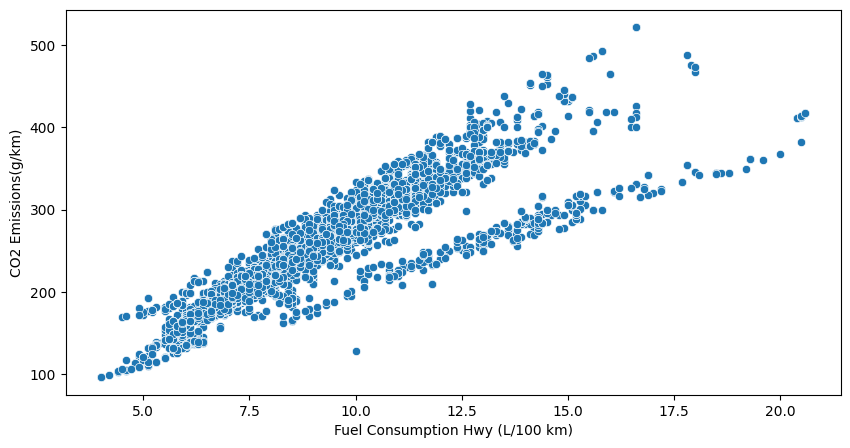

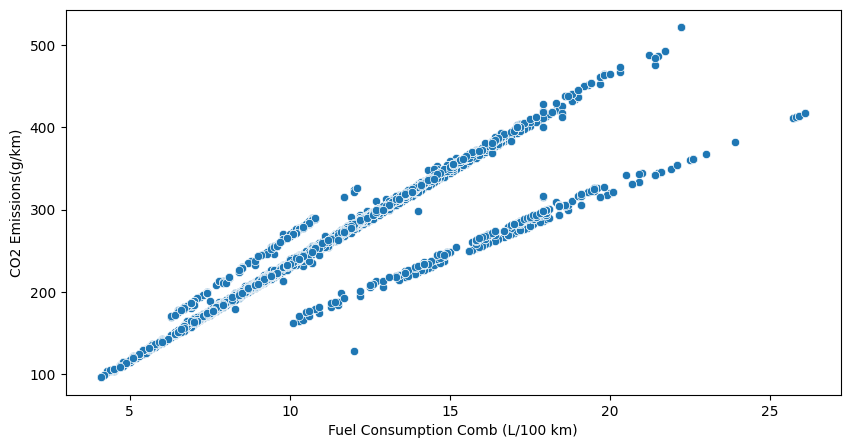

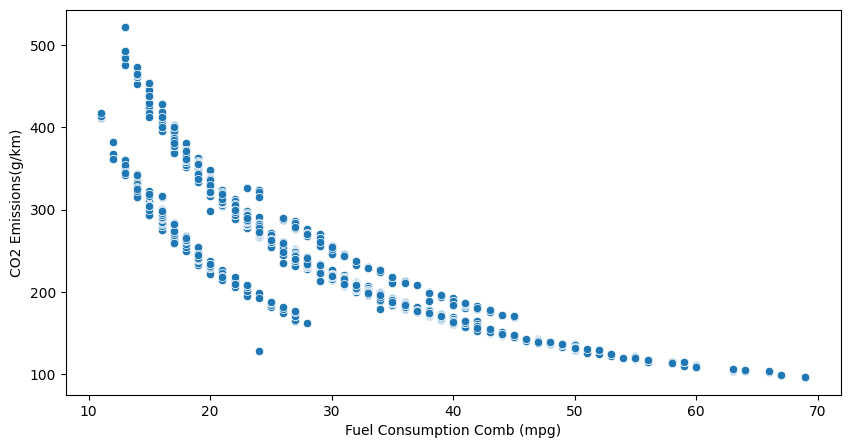

In [43]:
for i in num_var:
    plt.figure(figsize=[10,5])
    sns.scatterplot(y=df['CO2 Emissions(g/km)'],x=df[i]);

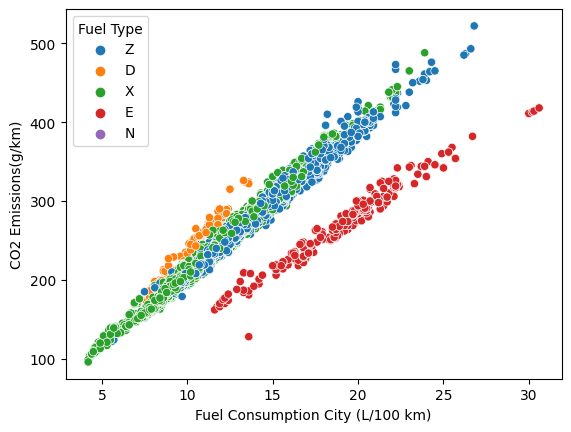

In [42]:
sns.scatterplot(y=df['CO2 Emissions(g/km)'],x=df['Fuel Consumption City (L/100 km)'],hue=df['Fuel Type']);

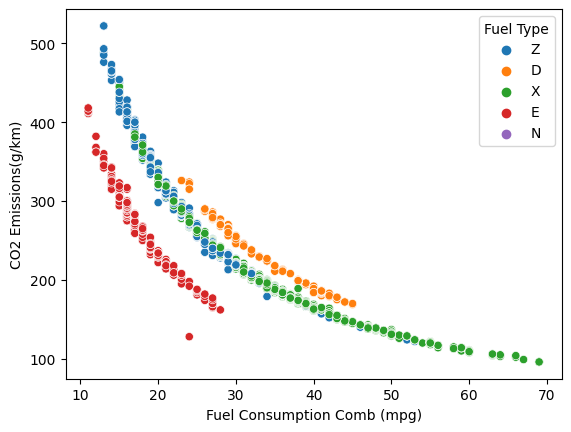

In [45]:
sns.scatterplot(y=df['CO2 Emissions(g/km)'],x=df['Fuel Consumption Comb (mpg)'],hue=df['Fuel Type']);

**Insights**
- as expected with the increase of Fuel consumption(L/100km)  $CO_2$ emission also increases
- $CO_2$ emission also decreases as Fuel consuption(mpg) increases.\
MPG numbers tells how many miles a car can go on a gallon of fuel.